<a href="https://colab.research.google.com/github/callor/Callor-Python-2024/blob/master/%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Seaborn은
# Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한
# 시각화 패키지이다.
# 기본적인 시각화 기능은 Matplotlib 패키지에 의존하며
# 통계 기능은 Statsmodels 패키지에 의존한다.
# 공식 사이트 : https://seaborn.pydata.org/
import seaborn as sns

In [ ]:
# 삼성전자 주가데이터 다운로드
# https://finance.yahoo.com/quote/005930.KS/history/?period1=949190400&period2=1727672569

# # 2012년 1월 4일 부터 2022년 12월 14일까지 일일 데이터를 다운로드 받아 파일로 생성.
# github 에 업로드된 데이터를 다운로드 받아 코랩 파일 디렉토리에 추가한 후 실행
# 데이터 URL : https://github.com/callor/Callor-DeepLearning-2022/blob/master/005930(2012-01-01).KS.csv


# plot 으로 시작화 하기 위한 파일 load format
# stocks = pd.read_csv('005930(2012-01-01).KS.csv', index_col = 'Date', parse_dates=True)

# seaborn 으로 시작화를 하기 위한 파일 load format
stocks = pd.read_csv('005930(2012-01-01).KS.csv', header=0)

# 날짜 칼럼 format 설정
# seaborn 으로 날짜항목을 연도별로 구분하여 표현하기 위해
# datetime format 으로 변환
stocks['Date'] = pd.to_datetime(stocks['Date'], format='%Y-%m-%d')

# stocks['Year'] = stocks['Date'].dt.year
# 조종 종가 칼럼 삭제
stocks = stocks.drop(columns='Adj Close')

print(stocks)

           Date   Open   High    Low  Close    Volume
0    2012-01-02  21400  21600  21300  21600  13151350
1    2012-01-03  21860  22100  21840  22100  16927750
2    2012-01-04  22100  22200  21500  21600  17103700
3    2012-01-05  21460  21580  21100  21100  17298400
4    2012-01-06  21120  21320  20600  20800  18816250
...         ...    ...    ...    ...    ...       ...
2690 2022-12-08  58700  59200  58600  59200  12986815
2691 2022-12-09  59300  60600  59300  60400  10529632
2692 2022-12-12  59900  60000  59400  59500   9036472
2693 2022-12-13  59600  60300  59400  59700   9040873
2694 2022-12-14  59800  60600  59800  60300   4443728

[2695 rows x 6 columns]


 ## 데이터 시각화
 - 거래량과 종가 등락 현황을 그래프화 해 본다

Text(0, 0.5, 'Volumn')

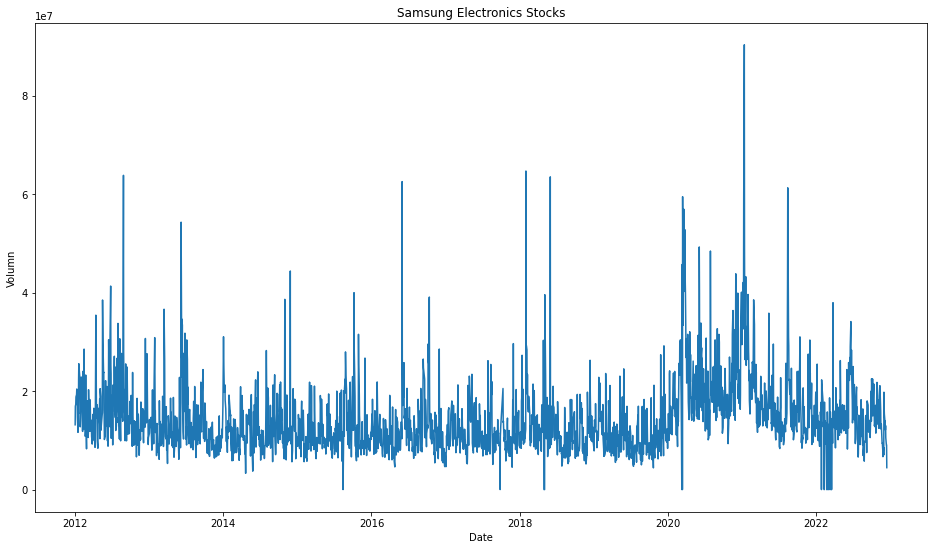

In [ ]:
# 거래량 비교 그래프
plt.figure(figsize=(16, 9))
sns.lineplot(y=stocks['Volume'], x=stocks['Date']).set(title='Samsung Electronics Stocks')
plt.xlabel('Date')
plt.ylabel('Volumn')

2021-1월 89000원대로 주가가 치솟을때  거래량이 피크를 이뤘다


Text(0, 0.5, 'Price')

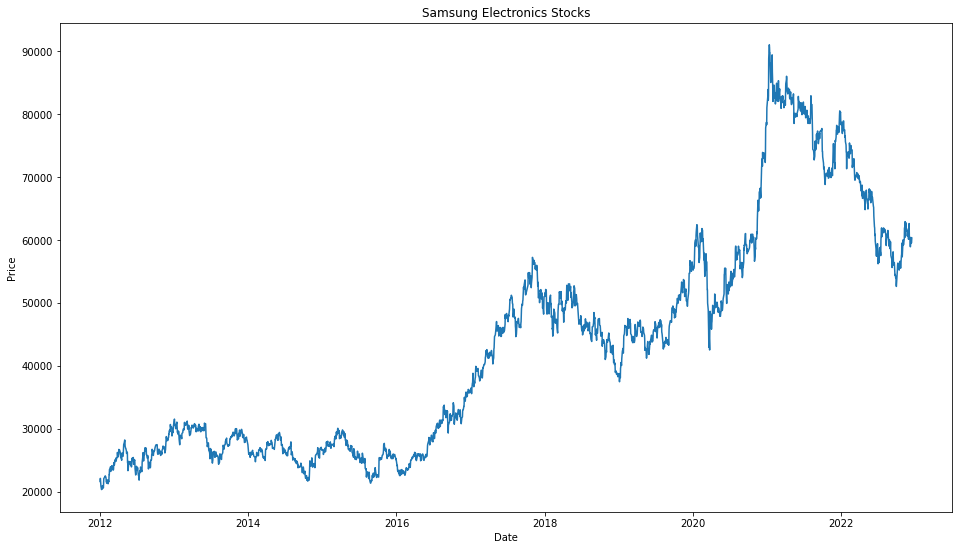

In [ ]:
# 종가기준 주가 그래프
plt.figure(figsize=(16, 9))
sns.lineplot(y=stocks['Close'], x=stocks['Date']).set(title='Samsung Electronics Stocks')
plt.xlabel('Date')
plt.ylabel('Price')

2021-01 경 89000원대까지 치솟았던 적이 있었다

## 데이터 정규화
이제 데이터 정규화를 진행하도록 한다.
minMaxScaler 를 사용하여 모든 값이 0 ~ 1의 값을 갖도록 설정한다
```python
정규화란, 모든 값을 0~1 사이의 값으로 바꾸는 것이다. 음수도 예외 없이 다 바꾼다. 표준화와는 차이가 있다.
수학식을 보면,
( X- (X의 최솟값) ) / ( X의 최댓값 - X의 최솟값 )이다.

예를들어 최댓값 10, 최솟값 2 일 때, 4는 어떻게 정규화될까?
(4 - 2) / (10 - 2 ) = 0.25로 정규화될 수 있다.

다음의 라이브러리를 사용한다
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_iris
import pandas as pd
```

## pandas dataframe
- 파이썬을 통해 데이터 분석을 할 때, Pandas를 빼놓고 이야기할 수 없다.  
온전히 통계 분석을 위해 고안된 R 과는 다르게 python은 일반적인 프로그래밍 언어(general purpose programming language) 이며,  
데이터 분석을 하기 위해서는 여러가지 라이브러리를 사용할 수 밖에 없다.  
이 패키지들 중 R의 dataframe 데이터 타입을 참고하여 만든 것이 바로 pandas dataframe이다.  
pandas는 dataframe을 주로 다루기 위한 라이브러리이며,  
dataframe을 자유롭게 가공하는 것은 데이터 과학자들에게 중요하다.  

## scikit-learn transform
#### fit_transform()
- fit_transform()은 train dataset을 만드는데 사용한다.  
우리가 만든 모델은 train data에 있는 mean과 variance를 학습하게 된다  
이렇게 학습된 Scaler()의 parameter는 test data를 scale하는데 사용된다  
train data로 학습된 Scaler()의 parameter를 통해 test data의 feature 값들이 스케일 된다.

In [ ]:
# sklearn 의 MinxMaxScaler 함수를 사용하여 데이터 정규화를 실행한다
from sklearn.preprocessing import MinMaxScaler

# 데이터를 저장된 순서 index 를 기준으로 내림차순 정렬을 한다
stocks.sort_index(ascending=False).reset_index(drop=True)

# 정규화준비
scaler = MinMaxScaler()

# 시가, 고가, 저가, 종가, 거래량
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df_scaled = scaler.fit_transform(stocks[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

print(df_scaled)

          Open      High       Low     Close    Volume
0     0.015433  0.014675  0.015589  0.018110  0.145631
1     0.022006  0.021226  0.023383  0.025184  0.187448
2     0.025436  0.022537  0.018476  0.018110  0.189397
3     0.016290  0.014413  0.012702  0.011036  0.191553
4     0.011432  0.011006  0.005485  0.006791  0.208361
...        ...       ...       ...       ...       ...
2690  0.548442  0.507338  0.553984  0.550085  0.143809
2691  0.557016  0.525681  0.564088  0.567063  0.116599
2692  0.565590  0.517820  0.565531  0.554329  0.100065
2693  0.561303  0.521751  0.565531  0.557159  0.100114
2694  0.564161  0.525681  0.571305  0.565648  0.049207

[2695 rows x 5 columns]


## 시계열 데이터의 데이터셋 분리
- 시계열 데이터의 데이터셋은 보통 window_size라고 정의한다.
- window_size는 과거 기간의 주가 데이터에 기반하여 다음날의 종가를 예측할 것인가를 정하는 parameter이다.
- 만약 과거 20일을 기반으로 내일 데이터를 예측한다라고 가정하면 window_size=20이 되는 것이다.
- 실제 앞에서 부터 2200개의 데이터를 데이터셋을 분리하도록 한다.
- make_dataset이라는 함수를 만들어 feature_list 와 label list를 분리한다.

In [ ]:
TEST_SIZE = 2000
train = df_scaled[-TEST_SIZE:]
test = df_scaled[:-TEST_SIZE]
print(train.shape, test.shape)

(2000, 5) (695, 5)


In [ ]:
# 데이터셋 분리를 위한 함수 선언언
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

## train_test_split 모듈을 활용하여 학습과 테스트 세트 분리한다
#### train / test 분리하는 이유?
- train / test 를 분리하는 목적을 정확히 알아야한다.
- 정확히 말하면, train / test 가 아닌 train / validation 으로 볼 수 있다
- 머신러닝 모델에 train 데이터를 100% 학습시킨 후 test 데이터에 모델을 적용했을 때 성능이 생각보다 않 나오는 경우가 많다  
이러한 현상을 보통 Overfitting 되었다라고 한다.
- 즉, 모델이 내가 가진 학습 데이터에 너무 과적합되도록 학습한 나머지, 이를 조금이라도 벗어난 케이스에 대해서는 예측율이 현저히 떨어지기 때문이이다.
- 그렇기 때문에 Overfitting을 방지하는 것은 전체적인 모델 성능을 따져보았을 때 매우 중요한 프로세스 중 하나이다

## Validation Set으로 검증 단계를 추가하여 Overfitting 방지
- train / test로 구분 되어 있었던 데이터 셋을 train 에서 train / validation으로 일정 비율 쪼갠 다음에 학습 시에는 train 셋으로 학습 후 중간중간 validation 셋으로 내가 학습한 모델 평가를 해주는 것이다
- 만약, 모델이 과적합되었다면, validation 셋으로 검증시 예측율이나 오차율이 떨어지는 현상을 확인할 수 있으며, 이런 현상이 나타나면 학습을 종료한다.

In [ ]:
from sklearn.model_selection import train_test_split

# Open	High	Low	Close	Adj Close	Volume	Year
feature_cols = ['Open', 'High', 'Low', 'Volume']
label_cols = ['Close']

train_feature = train[feature_cols]
train_label = train[label_cols]

# train feature 과 train label 로 분리하기
# 100개의 validation 데이터 제외하고
train_feature, train_label = make_dataset(train_feature, train_label, 20)
print(train_feature.shape, train_label.shape)


(1980, 20, 4) (1980, 1)


In [ ]:
# trans 데이터 셋과 validation 데이터 셋으로 분리
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

print(x_train.shape, x_valid.shape)

(1584, 20, 4) (396, 20, 4)


In [ ]:
test_feature = test[feature_cols]
test_label = test[label_cols]

print(test_feature.shape, test_label.shape)

(695, 4) (695, 1)


In [ ]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((675, 20, 4), (675, 1))

## 모델 학습
- 이제 Keras 모델을 생성하여 학습을 진행한다
- 먼저 모델을 만든다다

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

# 모델 생성성
model = Sequential()

max_feature = 2900
# 모델에 LSTM layer 추가
# model.add(Embedding(max_feature, output_dim=256))
model.add(LSTM(16,input_shape=(train_feature.shape[1], train_feature.shape[2])))
model.add(Dropout(0.01))
model.add(Dense(1, activation='relu'))

# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# model.add(LSTM(16,input_shape=(train_feature.shape[1], train_feature.shape[2]),activation='relu',return_sequences=False)
#           )

# model.add(Dense(1))

학습하기기

In [ ]:
import os
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train,
             epochs=100,
             batch_size=16,
             validation_data=(x_valid, y_valid),
             callbacks=[early_stop, checkpoint])

Epoch 1/100
98/99 [============================>.] - ETA: 0s - loss: 0.0113 - accuracy: 6.3776e-04
Epoch 1: val_loss improved from inf to 0.00051, saving model to model/tmp_checkpoint.h5
99/99 [==============================] - 3s 12ms/step - loss: 0.0112 - accuracy: 6.3131e-04 - val_loss: 5.1404e-04 - val_accuracy: 0.0000e+00
Epoch 2/100
92/99 [==========================>...] - ETA: 0s - loss: 9.7134e-04 - accuracy: 6.7935e-04
Epoch 2: val_loss improved from 0.00051 to 0.00049, saving model to model/tmp_checkpoint.h5
99/99 [==============================] - 1s 7ms/step - loss: 9.4839e-04 - accuracy: 6.3131e-04 - val_loss: 4.9458e-04 - val_accuracy: 0.0000e+00
Epoch 3/100
98/99 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 6.3776e-04
Epoch 3: val_loss improved from 0.00049 to 0.00041, saving model to model/tmp_checkpoint.h5
99/99 [==============================] - 1s 7ms/step - loss: 0.0011 - accuracy: 6.3131e-04 - val_loss: 4.1315e-04 - val_accuracy: 0.0000e+00

In [ ]:
print(test_feature.shape)

(675, 20, 4)


## 주가 예측
- predict()를 활용하여 모형을 예측한다.

In [ ]:
# model.load_weights(filename)
pred = model.predict(test_feature)

print(pred.shape)


22/22 [==============================] - 0s 3ms/step


(675, 1)

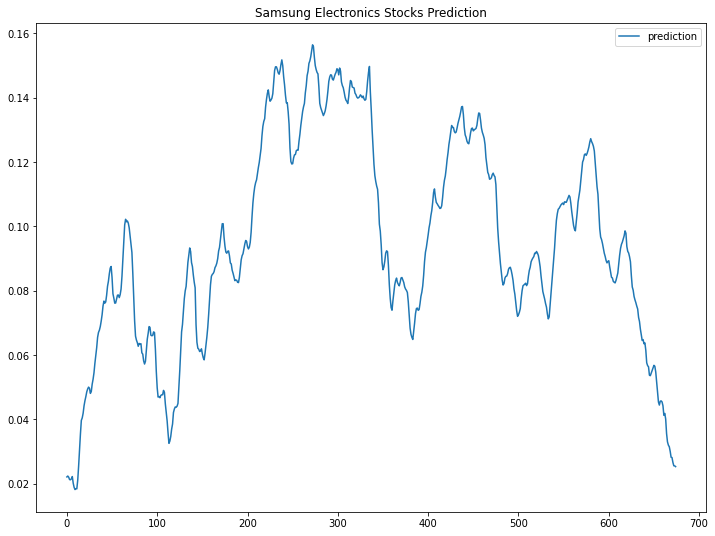

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(pred, label = 'prediction')
plt.title('Samsung Electronics Stocks Prediction')

plt.legend()
plt.show()

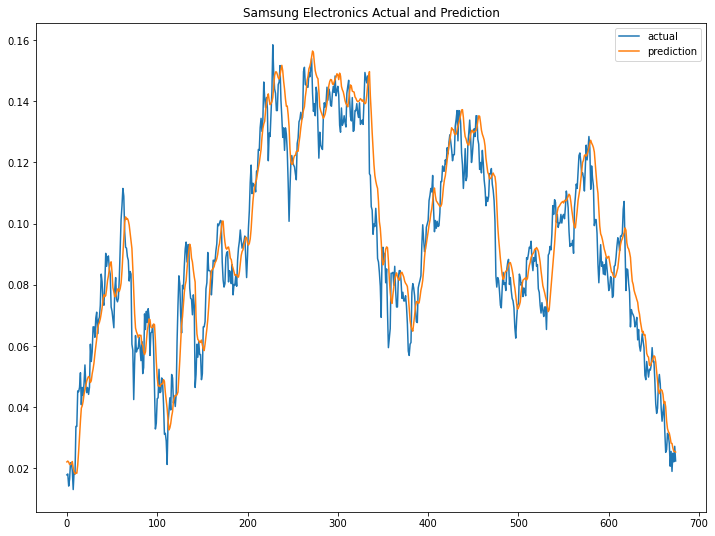

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.title('Samsung Electronics Actual and Prediction')

plt.legend()
plt.show()